<a href="https://colab.research.google.com/github/HYLee810/projectmanager/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_03_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EC%83%81%EC%B2%AD%EB%82%A0%EC%94%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter4: 데이터 분석

## 3. 공공데이터를 이용한 EDA 분석

## 02- 기상청 데이터 분석

---

## 기상청 데이터 분석(종관데이터)

### #파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 [사전준비] 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 1. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 2. 데이터 전처리하기 : 필요한 데이터만 추출하기
 3. 데이터 시각화하기 : 데이터 그래프로 나타내기
 4. 데이터 저장하기 :  파일로 저장하기

---

### #라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [1]:
import pandas  as pd
pd.__version__

'1.5.3'

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [3]:
import matplotlib as plt
plt.__version__

'3.7.1'

---

### 1.데이터 다운로드하기

- 기상청 사이트에서 날씨 데이터를 다운로드한다.
- 사이트에 가입하고 로그인해야 다운로드할 수 있다.
- https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
- csv파일 다운로드해서 사용
- OBS_ASOS_MNH_~.csv 파일 이름을 'weather_data.csv'로 변경해서 사용하기


---------

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩(Colab)의 런타임을 재시작 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
#[코랩용 한글]
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')        # 방법1
plt.rcParams['font.family'] = 'NanumBarunGothic' # 방법2

### 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기

In [2]:
import pandas as pd

# OBS_ASOS_MNH_~.csv 파일명 데이터를 'weather_data.csv'로 변경하기
file = './sample_data/weather_data.csv'
df = pd.read_csv(file, encoding='CP949')

print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
55950,295,남해,2022-12,2.5,11.8,-6.7,1018.2,58.0,7.8,1.6,187.6,NaN
55951,295,남해,2023-01,2.8,19.9,-11.7,1018.1,59.0,108.5,1.6,204.7,NaN
55952,295,남해,2023-02,5.2,15.0,-3.7,1019.0,58.0,34.5,1.3,174.5,NaN
55953,295,남해,2023-03,11.1,24.1,-1.7,1014.6,61.0,62.4,1.3,217.0,NaN


---

### 2.데이터 전처리(가공하기)
- 함수 참고:  https://pandas.pydata.org/docs/reference/index.html

#### # 데이터 요약

In [3]:
# 데이터 요약 정보
df.info() #12개의 column으로 된 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55955 entries, 0 to 55954
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  55955 non-null  int64  
 1   지점명                 55955 non-null  object 
 2   일시                  55955 non-null  object 
 3   평균기온(°C)            55327 non-null  float64
 4   최고기온(°C)            55757 non-null  float64
 5   최저기온(°C)            55732 non-null  float64
 6   평균현지기압(hPa)         53517 non-null  float64
 7   평균상대습도(%)           54760 non-null  float64
 8   월합강수량(00~24h만)(mm)  55662 non-null  float64
 9   평균풍속(m/s)           54799 non-null  float64
 10  합계 일조시간(hr)         54575 non-null  float64
 11  최심적설(cm)            11976 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.1+ MB


#### # 기술통계 정보

In [4]:
df.describe()

,지점,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
count,55955.000000,55327.000000,55757.000000,55732.000000,53517.000000,54760.000000,55662.000000,54799.000000,54575.000000,11976.000000
mean,186.960379,12.597059,24.301889,1.974078,1005.823032,69.783346,109.548936,2.321270,188.886023,8.185429
std,62.167835,9.157956,8.028580,10.761579,16.170267,9.897487,120.382089,1.289188,46.186371,14.841091
min,90.000000,-13.500000,-4.800000,-32.600000,911.800000,8.000000,0.000000,-0.400000,0.000000,0.000000
25%,134.000000,4.600000,17.800000,-6.600000,1001.200000,63.000000,30.300000,1.400000,159.000000,1.500000
50%,174.000000,13.100000,25.800000,1.200000,1008.600000,70.000000,67.600000,2.000000,189.300000,4.300000
75%,245.000000,20.900000,31.100000,11.300000,1015.900000,77.000000,144.775000,2.900000,219.300000,9.000000
max,295.000000,30.200000,41.000000,24.800000,1029.700000,99.000000,1364.200000,22.700000,1300.300000,293.600000


#### # 결측데이터 시각화
missingno패키지는 pandas 데이터프레임 데이터에서 누락된 데이터를 찾고 시각화하는 기능 제공

In [5]:
!pip install missingno

- **행에 결측 데이터 시각화**

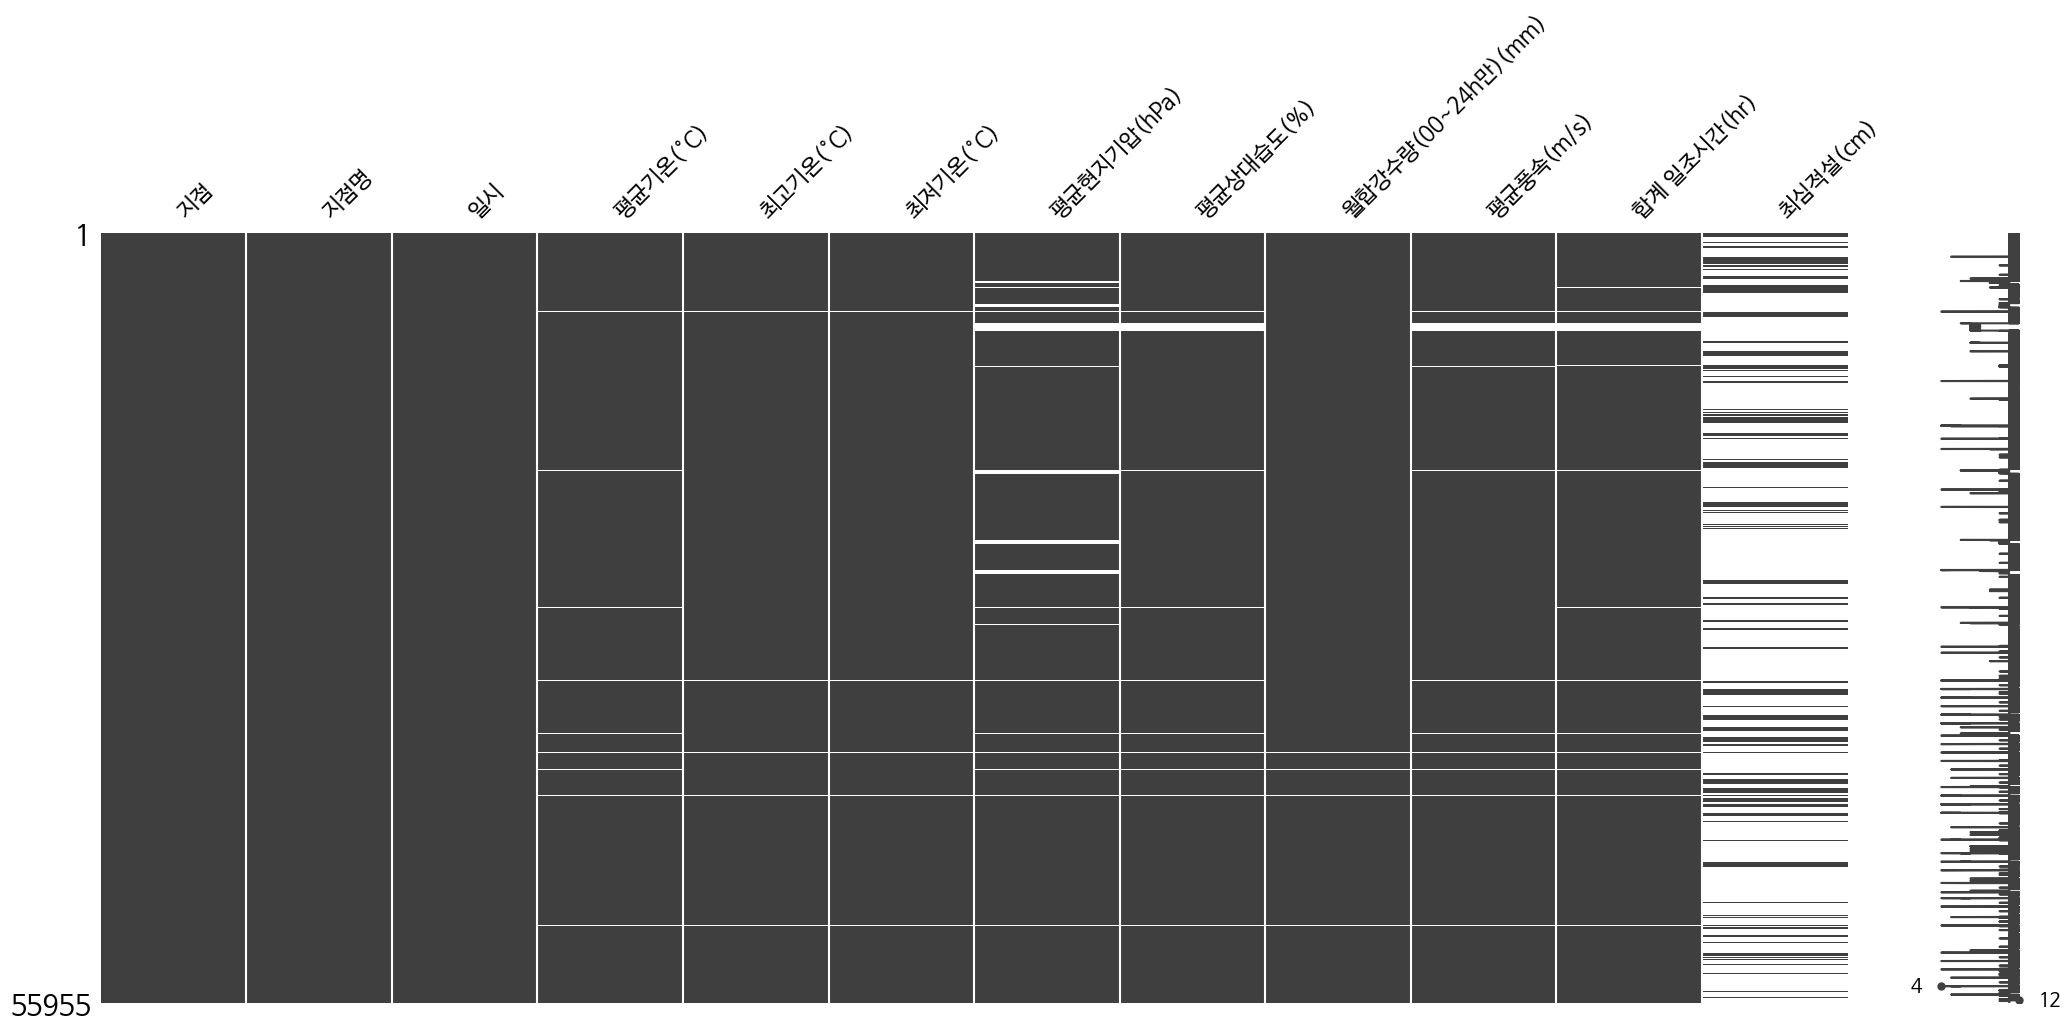

In [6]:
import missingno as msno # 결측치 찾는 라이브러리
import matplotlib.pyplot as plt # 시각화
# plt.rc('font', family='NanumBarunGothic') # 윈도우용 폰트-코랩용은 해당폰트 지정

msno.matrix(df)
plt.show() #결측데이터를 흰 부분으로 시각화 해준다

- **열에 결측 데이터 시각화**

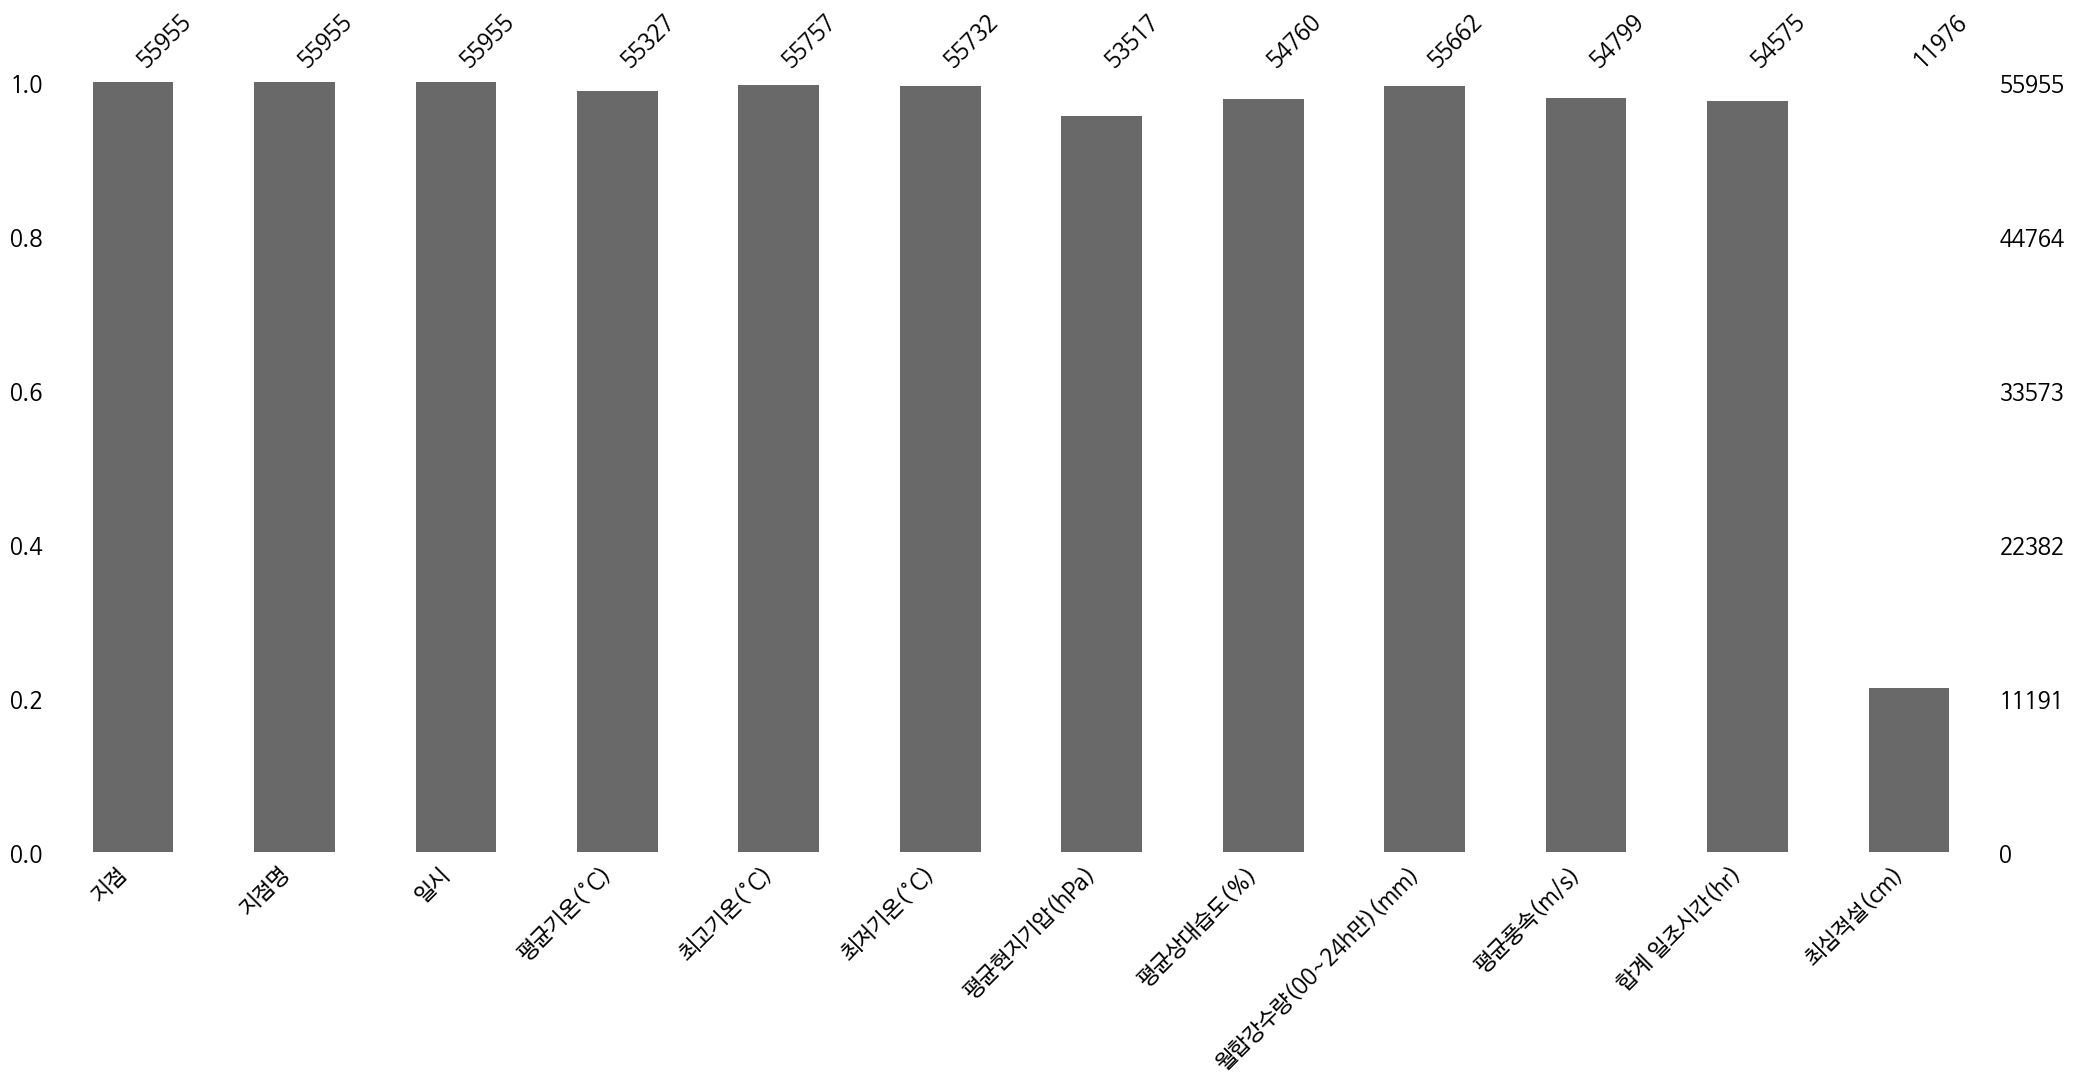

In [7]:
msno.bar(df)
plt.show()

---

#### 2. 컬럼명 변경하기

In [8]:
df.columns
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온', '평균현지기압',
       '평균상대습도', '월합강수량', '평균풍속','일조시간', '최심적설']
df.head(3)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0


#### 3. 컬럼 추가하기
DataFrame.insert(추가하고싶은위치,컬럼명,값, allow_duplicate=False)

In [9]:
df.insert(3,'신규2',df['지점'])
df

,지점,지점명,일시,신규2,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,90,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,90,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55950,295,남해,2022-12,295,2.5,11.8,-6.7,1018.2,58.0,7.8,1.6,187.6,NaN
55951,295,남해,2023-01,295,2.8,19.9,-11.7,1018.1,59.0,108.5,1.6,204.7,NaN
55952,295,남해,2023-02,295,5.2,15.0,-3.7,1019.0,58.0,34.5,1.3,174.5,NaN
55953,295,남해,2023-03,295,11.1,24.1,-1.7,1014.6,61.0,62.4,1.3,217.0,NaN


In [14]:
# 한번 더 실행하면 인덱스에 같은 이름이 있기 때문에 오류 발생

In [10]:
df.insert(3,'검색일자',df['일시'])
df

,지점,지점명,일시,검색일자,신규2,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968-03,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968-04,90,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968-05,90,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55950,295,남해,2022-12,2022-12,295,2.5,11.8,-6.7,1018.2,58.0,7.8,1.6,187.6,NaN
55951,295,남해,2023-01,2023-01,295,2.8,19.9,-11.7,1018.1,59.0,108.5,1.6,204.7,NaN
55952,295,남해,2023-02,2023-02,295,5.2,15.0,-3.7,1019.0,58.0,34.5,1.3,174.5,NaN
55953,295,남해,2023-03,2023-03,295,11.1,24.1,-1.7,1014.6,61.0,62.4,1.3,217.0,NaN


In [11]:
df

,지점,지점명,일시,검색일자,신규2,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968-03,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968-04,90,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968-05,90,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55950,295,남해,2022-12,2022-12,295,2.5,11.8,-6.7,1018.2,58.0,7.8,1.6,187.6,NaN
55951,295,남해,2023-01,2023-01,295,2.8,19.9,-11.7,1018.1,59.0,108.5,1.6,204.7,NaN
55952,295,남해,2023-02,2023-02,295,5.2,15.0,-3.7,1019.0,58.0,34.5,1.3,174.5,NaN
55953,295,남해,2023-03,2023-03,295,11.1,24.1,-1.7,1014.6,61.0,62.4,1.3,217.0,NaN


In [12]:
df.head(3)

,지점,지점명,일시,검색일자,신규2,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968-03,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0


- **문자열에서 특정 문자 제거**: '검색일자' 값중에 '년도-월-일' 형태로 되어 있는 구조에서  '-'기호를 제거

In [13]:
df['검색일자']= df['일시'].str.replace(pat=r'-',repl=r'',regex=True) # 자리 지정하지 않았기 때문에 제일 뒷 자리에 생성
df.head(2)

,지점,지점명,일시,검색일자,신규2,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,196801,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,196802,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55955 entries, 0 to 55954
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점      55955 non-null  int64  
 1   지점명     55955 non-null  object 
 2   일시      55955 non-null  object 
 3   검색일자    55955 non-null  object 
 4   신규2     55955 non-null  int64  
 5   평균기온    55327 non-null  float64
 6   최고기온    55757 non-null  float64
 7   최저기온    55732 non-null  float64
 8   평균현지기압  53517 non-null  float64
 9   평균상대습도  54760 non-null  float64
 10  월합강수량   55662 non-null  float64
 11  평균풍속    54799 non-null  float64
 12  일조시간    54575 non-null  float64
 13  최심적설    11976 non-null  float64
dtypes: float64(9), int64(2), object(3)
memory usage: 6.0+ MB


- **데이터형 변환하기**: str(object)-->int64 형으로 변환하기

In [15]:
df['검색일자'] = df['검색일자'].apply('int64') # 원래는 str인데 int로 데이터 타입 변경
df.dtypes

지점          int64
지점명        object
일시         object
검색일자        int64
신규2         int64
평균기온      float64
최고기온      float64
최저기온      float64
평균현지기압    float64
평균상대습도    float64
월합강수량     float64
평균풍속      float64
일조시간      float64
최심적설      float64
dtype: object

- **데이터형 변환하기**: int64 --> str(object)형으로 변환하기

In [16]:
df['검색일자'] = df['검색일자'].apply(str)
df.dtypes

지점          int64
지점명        object
일시         object
검색일자       object
신규2         int64
평균기온      float64
최고기온      float64
최저기온      float64
평균현지기압    float64
평균상대습도    float64
월합강수량     float64
평균풍속      float64
일조시간      float64
최심적설      float64
dtype: object

In [17]:
# 년월 추가
df.insert(3,'년도',df['검색일자'].str[0:4])
df

,지점,지점명,일시,년도,검색일자,신규2,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,196801,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,196802,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968,196803,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968,196804,90,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968,196805,90,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55950,295,남해,2022-12,2022,202212,295,2.5,11.8,-6.7,1018.2,58.0,7.8,1.6,187.6,NaN
55951,295,남해,2023-01,2023,202301,295,2.8,19.9,-11.7,1018.1,59.0,108.5,1.6,204.7,NaN
55952,295,남해,2023-02,2023,202302,295,5.2,15.0,-3.7,1019.0,58.0,34.5,1.3,174.5,NaN
55953,295,남해,2023-03,2023,202303,295,11.1,24.1,-1.7,1014.6,61.0,62.4,1.3,217.0,NaN


#### 4. 컬럼 삭제

In [18]:
# df.drop(['신규','신규2'], axis=1, inplace=True)
df.drop('신규2', axis=1, inplace=True)
df.drop('검색일자', axis=1, inplace=True)
df.head(3)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0


#### 5. 특정 조건 검색

In [19]:
print( '#지점명 개수: ', len( set(df['지점명']) ) )
print( '#지점명: ', set( df['지점명'] ) )

#지점명 개수:  102
#지점명:  {'북강릉', '관악산', '구미', '광주', '순창군', '양산시', '영월', '홍성', '해남', '청송군', '군산', '북창원', '함양군', '수원', '삼척', '양평', '충주', '강릉', '고창군', '거제', '인천', '부여', '장흥', '밀양', '속초', '제천', '완도', '대구', '금산', '홍천', '의령군', '임실', '창원', '봉화', '고창', '진도군', '의성', '보성군', '북춘천', '부산', '태백', '정선군', '남해', '울진', '청주', '서울', '목포', '성산포', '부안', '흑산도', '상주', '안동', '합천', '진주', '이천', '영덕', '통영', '제주', '백령도', '대관령', '광양시', '울산', '대구(기)', '장수', '정읍', '산청', '천안', '철원', '서산', '영주', '고흥', '김해시', '진도(첨찰산)', '거창', '세종', '강진군', '원주', '순천', '경주시', '고산', '서귀포', '동해', '추풍령', '인제', '보은', '주암', '강화', '영천', '춘천', '여수', '동두천', '파주', '전주', '보령', '포항', '대전', '울릉도', '문경', '무안', '영광군', '남원', '성산'}


In [20]:
# 특정년도 데이터
df_2023 = df.query(" 년도 == '2023' ")
# df_2023 = df[ df['년도']=='2023' ]
df_2023.head(2)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
660,90,속초,2023-01,2023,0.2,15.1,-16.0,1019.9,45.0,94.7,2.0,215.7,NaN
661,90,속초,2023-02,2023,2.7,15.6,-6.4,1022.3,53.0,43.4,1.9,186.6,NaN


In [21]:
#  print( '#지점명 개수: ', len( set(df_2023['지점명']) ) )
print( '#지점명: ', set( df_2023['지점명'] ) )
print( '#지점명 개수: ', len( set( df[ df['년도']=='2023' ]['지점명']) ) )

#지점명:  {'북강릉', '구미', '광주', '순창군', '양산시', '영월', '홍성', '해남', '청송군', '군산', '북창원', '함양군', '수원', '양평', '충주', '강릉', '고창군', '거제', '인천', '부여', '장흥', '밀양', '속초', '제천', '완도', '대구', '금산', '홍천', '의령군', '임실', '창원', '봉화', '고창', '진도군', '의성', '보성군', '북춘천', '부산', '태백', '정선군', '남해', '울진', '청주', '서울', '목포', '부안', '흑산도', '상주', '안동', '합천', '진주', '이천', '영덕', '통영', '제주', '백령도', '대관령', '광양시', '울산', '장수', '정읍', '산청', '천안', '철원', '서산', '영주', '고흥', '김해시', '거창', '세종', '강진군', '원주', '순천', '경주시', '고산', '서귀포', '동해', '추풍령', '인제', '보은', '강화', '영천', '춘천', '여수', '동두천', '파주', '전주', '보령', '포항', '대전', '울릉도', '문경', '영광군', '남원', '성산'}
#지점명 개수:  95


#### df의 정의
df=pd.DataFrame(data, index= , columns= )

In [22]:
# 년도=='2023'이면서 전라북도 관측소 데이터만 추출하기
df.query("년도 == '2023' and 지점명 in ('고창','고창군','전주','정읍','장수') ")
df_2023.query(" 지점명 in ('고창','고창군','전주','정읍','장수')").head(2)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
19898,146,전주,2023-01,2023,0.8,17.0,-15.0,1017.5,64.0,26.8,1.8,199.8,1.0
19899,146,전주,2023-02,2023,3.0,14.9,-5.7,1018.3,62.0,9.6,1.5,179.5,0.4


- **특정 컬럼명 검색** : 지점명=='제주' 데이터

In [23]:
df[df.지점명 == '제주' ] # df[df['지점명'] == '제주'] 와 같음

# df.query(" 지점명 == '제주' ")

# df.iloc[ df.index[ df['지점명'] == '제주' ] ]

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
28444,184,제주,1923-05,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
28445,184,제주,1923-06,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
28446,184,제주,1923-07,1923,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
28447,184,제주,1923-08,1923,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
28448,184,제주,1923-09,1923,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29639,184,제주,2022-12,2022,6.9,14.6,-0.4,1022.7,66.0,35.3,4.5,48.7,2.7
29640,184,제주,2023-01,2023,6.8,20.7,-3.4,1022.5,68.0,42.1,4.0,86.7,3.7
29641,184,제주,2023-02,2023,7.7,16.4,1.1,1023.0,71.0,89.6,3.1,117.2,NaN
29642,184,제주,2023-03,2023,12.3,22.4,2.4,1018.5,66.0,49.6,2.7,211.1,NaN


- **또는(|) , 포함(in)** 조건 사용: 강릉 또는 속초 데이터 추출

In [24]:
# 또는(|) 사용 => in과 같음
df.query(" 지점명=='제주' | 지점명=='서귀포' ")
df.head()

# df.query(" 지점명=='제주' | 지점명=='서귀포' ").head()

# df.query(" 지점명 in ('제주','서귀포') ").head(2)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN


- **그리고(&)** 조건 사용

In [25]:
df[ (df.지점명 == '제주' ) & (df.최고기온 >35) ].tail(2) # 끝에서 두 데이터만

# df.query(" 지점명=='제주' & 최저기온 <= 0 ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
29634,184,제주,2022-07,2022,28.4,36.0,23.2,1003.8,80.0,149.0,3.1,230.6,NaN
29635,184,제주,2022-08,2022,29.2,37.5,21.2,1005.8,75.0,124.3,3.1,232.4,NaN


### [실습문제] 관측 지점이 제주도인 데이터 검색

In [26]:
# 포함(in) 사용
df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
28444,184,제주,1923-05,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
28445,184,제주,1923-06,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
28446,184,제주,1923-07,1923,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
28447,184,제주,1923-08,1923,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
28448,184,제주,1923-09,1923,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47648,265,성산포,2006-11,2006,14.3,24.1,4.9,1016.6,68.0,85.5,3.8,141.5,NaN
47649,265,성산포,2006-12,2006,8.5,17.3,0.2,1023.0,69.0,90.5,3.0,115.1,0.3
47650,265,성산포,2007-01,2007,6.9,14.6,0.6,1023.0,66.0,46.3,3.3,109.2,1.7
47651,265,성산포,2007-02,2007,9.1,17.7,0.5,1018.0,67.0,60.7,3.7,164.2,2.8


- **min()** : 최초 측정월, 마지막 측정월

In [27]:
# 측정월 최소, 최대
print ( '최초 측정일시: ', min(df['일시']) )
print ( '최초 측정일시: ', df['일시'].min() )
print ( '최근 측정일시: ', max(df['일시']) )
print ( '최근 측정일시: ', df['일시'].max() )

# 측정 최초월('1904-04')의 데이터
# df['일시'].min()
# df.query(" 일시 == '1904-04-01'")

df.query(f" 일시 == '{ df['일시'].min() }' ")
df[ df['일시'] == df['일시'].min() ]

최초 측정일시:  1904-04
최초 측정일시:  1904-04
최근 측정일시:  2023-04
최근 측정일시:  2023-04


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
6561,112,인천,1904-04,1904,NaN,19.2,6.4,NaN,NaN,104.9,NaN,NaN,NaN
22303,159,부산,1904-04,1904,NaN,21.4,4.7,NaN,NaN,172.9,NaN,NaN,NaN
24488,165,목포,1904-04,1904,NaN,20.2,NaN,NaN,NaN,34.7,NaN,NaN,NaN


In [28]:
# 전주 최초 측정일
df_junjoo = df.query(f" 지점명 == '전주' ")
df_junjoo['일시'].min()

'1918-06'

- **max()** : 최근 측정 월 검색

In [36]:
df.query(f" 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
663,90,속초,2023-04,2023,12.6,26.9,4.0,1011.6,61.0,57.0,2.2,212.2,NaN
742,93,북춘천,2023-04,2023,12.1,27.8,-2.2,1003.6,65.0,95.7,1.6,208.2,NaN
1166,95,철원,2023-04,2023,11.7,27.0,-1.6,996.5,64.0,97.5,1.6,213.9,NaN
1470,98,동두천,2023-04,2023,12.7,28.7,-0.7,1001.1,59.0,94.6,1.5,198.9,NaN
1726,99,파주,2023-04,2023,11.8,27.2,-1.3,1011.8,68.0,102.3,1.7,185.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53509,285,합천,2023-04,2023,14.0,28.8,-0.4,1011.6,60.0,44.6,1.2,198.4,NaN
54114,288,밀양,2023-04,2023,14.5,29.7,0.7,1013.8,57.0,52.5,1.3,209.9,NaN
54726,289,산청,2023-04,2023,13.2,29.7,0.1,999.4,64.0,84.2,1.9,198.1,NaN
55339,294,거제,2023-04,2023,14.2,25.3,4.3,1010.2,68.0,136.5,1.8,202.8,NaN


In [ ]:
df.query(f" 지점명 == '전주' & 일시 == '{ df['일시'].min() }' ")

In [38]:
df.query(f" 지점명 in ('제주','성산','고산','성산포','서귀포') & 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
29643,184,제주,2023-04,2023,15.5,28.6,7.4,1013.2,69.0,62.1,3.6,204.1,NaN
30067,185,고산,2023-04,2023,14.6,22.4,7.7,1006.4,72.0,102.7,6.9,192.0,NaN
31110,188,성산,2023-04,2023,15.0,22.6,4.2,1013.1,71.0,183.1,4.0,210.5,NaN
31858,189,서귀포,2023-04,2023,15.8,25.6,6.7,1009.3,70.0,191.1,2.2,200.8,NaN


### [실습]: 가장 더웠던 날짜와 온도는?
- 기상관측 데이터에서 가장 더웠던(추웠던) 해와 기온은?

In [39]:
# 컬럼 추출
df['최고기온'].max()
print(df.최고기온.max())


# 행 추출 // 최고기온에 해당하는 행 전체 출력
df.query(f" 최고기온 == {  df.최고기온.max()  } ")
df[ df.최고기온 == df.최고기온.max() ]

41.0


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
35562,212,홍천,2018-08,2018,27.2,41.0,15.8,991.7,73.0,300.6,1.4,234.4,NaN


In [40]:
df_seoul = df[(df.지점명=='관악산')|(df.지점명=='서울')]
df_seoul.query(f" 최고기온 == {  df_seoul.최고기온.max()  } ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
6504,108,서울,2018-08,2018,28.8,39.6,20.2,997.4,65.0,202.6,1.7,232.5,NaN


In [ ]:
# 측정 지점이 서울인 것
df_seoul = df[(df.지점명=='관악산')|(df.지점명=='서울')]

# 측정 지점이 서울이면서 최고기온인 행 가져오기
# df_seoul.query(f" 최고기온 == {  df_seoul.최고기온.max()  } ")
df_seoul[ df_seoul.최고기온 == df_seoul.최고기온.max() ]

In [41]:
# 행 추출 특정 컬럼값(year) 추출
print(f'기상관측 데이터를 통해 가장 더웠던 년도는?')
print(df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:4] )


yymm = df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:7]
yymm = df[ df.최고기온 == df.최고기온.max() ].일시.str[0:7]
print(f'기상관측 데이터를 통해 가장 더웠던 년-월: {yymm}')


# 행 추출 특정 컬럼값(최고기온) 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ").최고기온
df[ df.최고기온 == df.최고기온.max() ].최고기온

기상관측 데이터를 통해 가장 더웠던 년도는?
35562    2018
Name: 일시, dtype: object
기상관측 데이터를 통해 가장 더웠던 년-월: 35562    2018-08
Name: 일시, dtype: object


35562    41.0
Name: 최고기온, dtype: float64

In [42]:
# 전체 최고기온
df.query(f" 최고기온 == {df['최고기온'].max()} ")

# 전체 최고기온 일시
df.query(f" 최고기온 == {df['최고기온'].max()} ")['일시'].str[0:4]

# 전체 최고기온 지점명
df.query(f" 최고기온 == {df['최고기온'].max()} ")['지점명']

# # 측정 지점이 제주인  최고기온
df.query(f" 지점명=='제주' ")['최고기온'].max()


# 측정 지점이 제주 전역의   최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최고기온'].max()

37.5

### [실습]: 가장 추웠던 날짜와 온도는?

In [52]:
field = '최저기온'

# 전체 최저기온
df.query(f" {field} <= { df[field].min() } ")

# 전체 최저기온 일시
df.query(f" {field} <= { df[field].min() } ")['일시'].str[0:4]

# 전체 최저기온 지점명
df.query(f" {field} <= { df[field].min() } ")['지점명']

# 측정 지점이 제주인 최저기온
df.query(f" 지점명=='제주' ")[field].min()

# 측정 지점이 제주 전역의  최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최저기온'].min()


-7.0

###  [실습] : 'OO'에서 가장 더웠던 날짜와 기온?

###  [실습] : 'OO'에서 가장 추웠던 날짜와 기온은?

--------

### 그룹핑(Grouping)

#### #그룹핑: 지점별  

In [ ]:
df.groupby(['지점명'], as_index=False).mean()
df.groupby('지점명').mean()

In [ ]:
df.groupby(['지점명'], as_index=False).count()

#### #그룹핑(컬럼1개): 지점별  평균기온

In [ ]:
# 방법1
df['평균기온'].groupby(df['지점명']).mean()

In [ ]:
# 방법2
df.groupby('지점명')['평균기온'].agg('mean')

In [ ]:
# 방법3
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean'})

In [ ]:
# 방법4
df.groupby('지점명').aggregate({'평균기온':'mean'})

In [ ]:
df_temp = df.groupby('지점명').aggregate({'평균기온':'mean'})
df_temp.plot()

<Axes: xlabel='년도'>

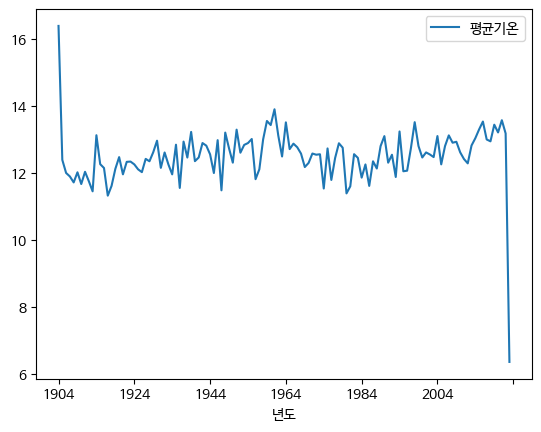

In [29]:
df_temp = df.groupby('년도').aggregate({'평균기온':'mean'})
df_temp.plot()

#### #그룹핑(컬럼 2개): 지점명+년도별,  평균기온

In [ ]:
df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균':'mean'})
df.groupby(['지점명','년도']).aggregate({'평균기온':'mean'})
#df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균기온':'mean'}).reset_index()

<Axes: xlabel='지점명,년도'>

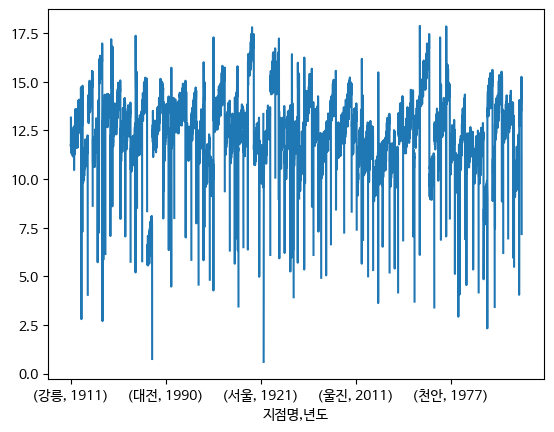

In [30]:
df_temp = df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df_temp.plot()

### [실습문제] : 지점별 최고기온?

- 인텍스를 초기화 하는 방법

In [ ]:
# 인텍스를 초기화 하는 방법
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
df.groupby('지점명').aggregate({'최고기온':'max'}).reset_index()

### [실습문제] : 지점별 년도별 최다 월합강수량?

### [실습문제]  OO 지역의 지점별+년도별 최고 최고기온, 최저 최저기온 ,최다 월합강수량, 최다 최심적실은?

#### # DataFrame에서 한 행씩 불러오기
!!![주의]!!! 데이터가 많을 경우 실행하지 않도록

In [ ]:
# 한 행씩 불러오기  ---->
# for i, row in df_t.iterrows():
#     print(i, row)
#     print(i, row['지점명'], row['최고기온'])

#### 6.가공된 파일 신규 저장하기

In [32]:
# 가공된 데이터 신규 파일로 저장하기
file = './sample_data/weather_data2.csv'
df.to_csv(file, encoding='cp949', mode='w', index=True)

--------------------------

## 3. 데이터 시각화하기

### [실습] : 지점별 평균기온 그래프

In [38]:
#[코랩용 한글]
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')        # 방법1
plt.rcParams['font.family'] = 'NanumBarunGothic' # 방법2

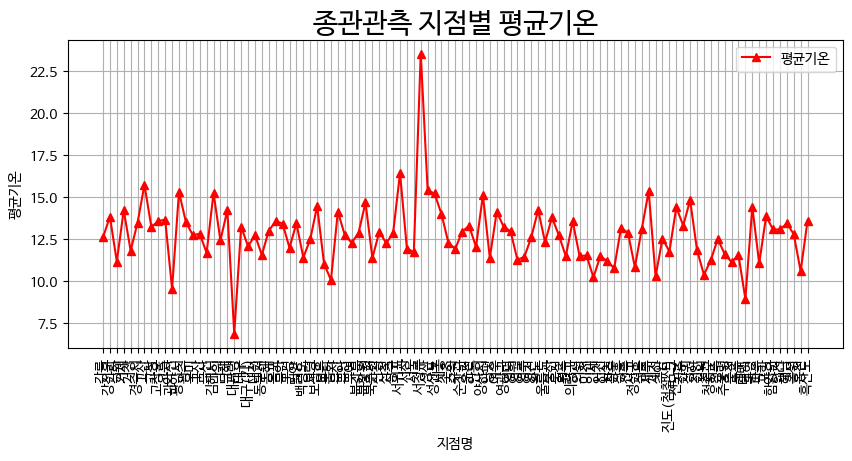

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = './sample_data/weather_data.csv'
file = './sample_data/OBS_ASOS_MNH_20230830103358.csv'
df = pd.read_csv(file, encoding='CP949')

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)


# 3.지점별 평균 구하기(지점 30개만 추출)
df_mean = df.groupby('지점명').aggregate({'평균기온':'mean'})

plt.plot(df_mean, '^', linestyle='solid', c='red', label='평균기온')
plt.xticks(rotation=90)
plt.title('종관관측 지점별 평균기온', fontsize=20)
plt.xlabel('지점명'); plt.ylabel('평균기온');
plt.legend(); plt.grid();
plt.show()

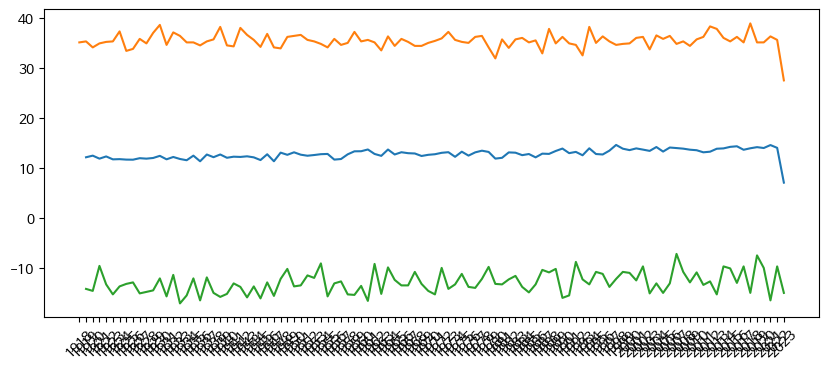

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus'] = False

# 1.데이터 불러오기
file = './sample_data/weather_data.csv'
df = pd.read_csv(file, encoding='CP949')

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)

# 3.전주지역 데이터만 추출
df_junju =  df.query(" 지점명 == '전주'")
df_junju = df_junju.groupby('년도').aggregate({'평균기온':'mean', '최고기온':'max', '최저기온':'min' })
df_junju

plt.plot(df_junju)
plt.xticks(rotation=45)
plt.show()

### [실습문제] : '제주' 지점의 년도별 평균기온을  선 그래프로 나타내기

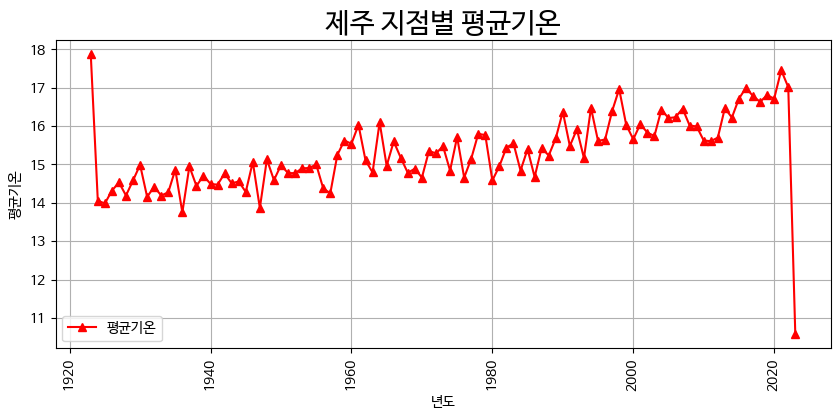

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = './sample_data/weather_data2.csv'
df = pd.read_csv(file, encoding='CP949')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df


# 2,지점별 연도별 그룹핑하기
df2 = df.query(" 지점명 == '제주' ")
# df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'평균기온':'mean'}).reset_index()

X = df2.년도
Y = df2.평균기온

# 3.지점별 평균 구하기(지점 30개만 추출)
plt.plot(X, Y, '^', linestyle='solid', c='r', label='평균기온')
plt.title('제주 지점별 평균기온', fontsize=20)
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

### [실습]: 제주의 평균기온, 최고기온, 최저기온 통계를 그래프로 나타내기

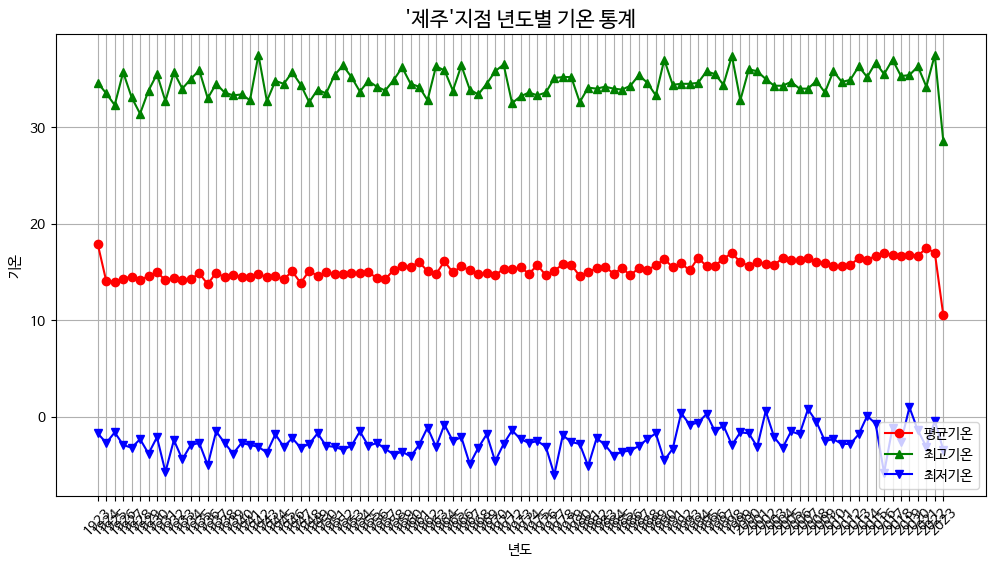

In [46]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도').평균기온.agg(**{'평균기온':'mean'})
data2 = data.groupby('년도').최고기온.agg(**{'최고기온':'max'})
data3 = data.groupby('년도').최저기온.agg(**{'최저기온':'min'})

# 3. 그래프로 시각화하기
plt.plot(data1, 'o', linestyle='solid', c='r', label='평균기온')
plt.plot(data2, '^', linestyle='solid', c='g', label='최고기온')
plt.plot(data3, 'v', linestyle='solid', c='b', label='최저기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')     # x축 레이블
plt.ylabel('기온')     # y축 레이블
plt.legend()           #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기
plt.grid()               # 격자 표시

plt.show()


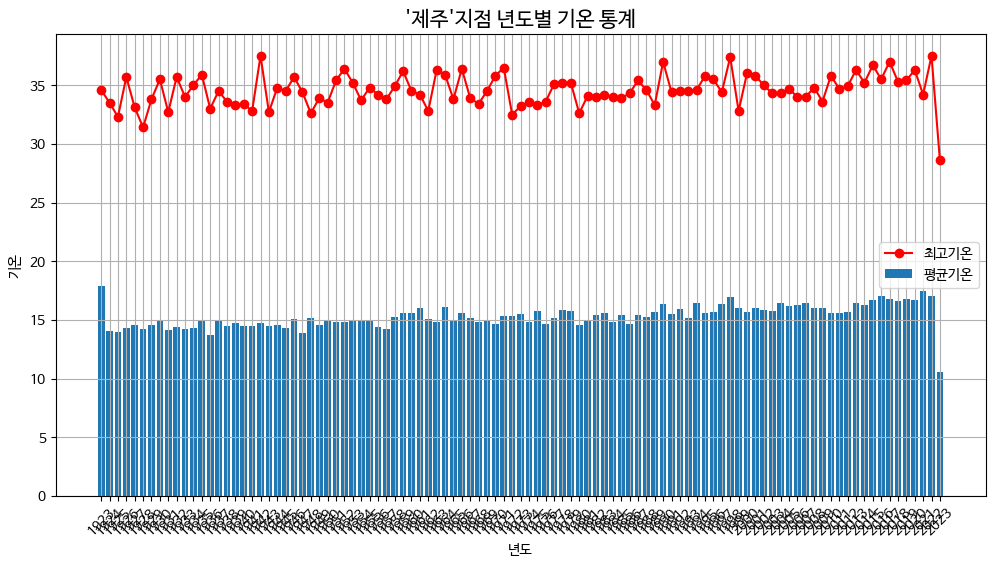

In [47]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['axes.unicode_minus'] = False

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'}).reset_index()
data2 = data.groupby('년도')['최고기온'].agg(**{'최고기온':'max'}).reset_index()

# 3. 그래프로 시각화하기
X = data1['년도']
Y1 = data1['평균기온']
Y2 = data2['최고기온']
plt.bar(X, Y1, label='평균기온')
plt.plot(X, Y2, 'o', linestyle='solid', c='r', label='최고기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')        # x축 레이블
plt.ylabel('기온')        # y축 레이블
plt.legend()             #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기

plt.grid()               # 격자 표시

plt.show()

### [실습]: 제주의 최고기온(선그래프),평균기온(막대그래프)을 혼합 그래프로 나타내기

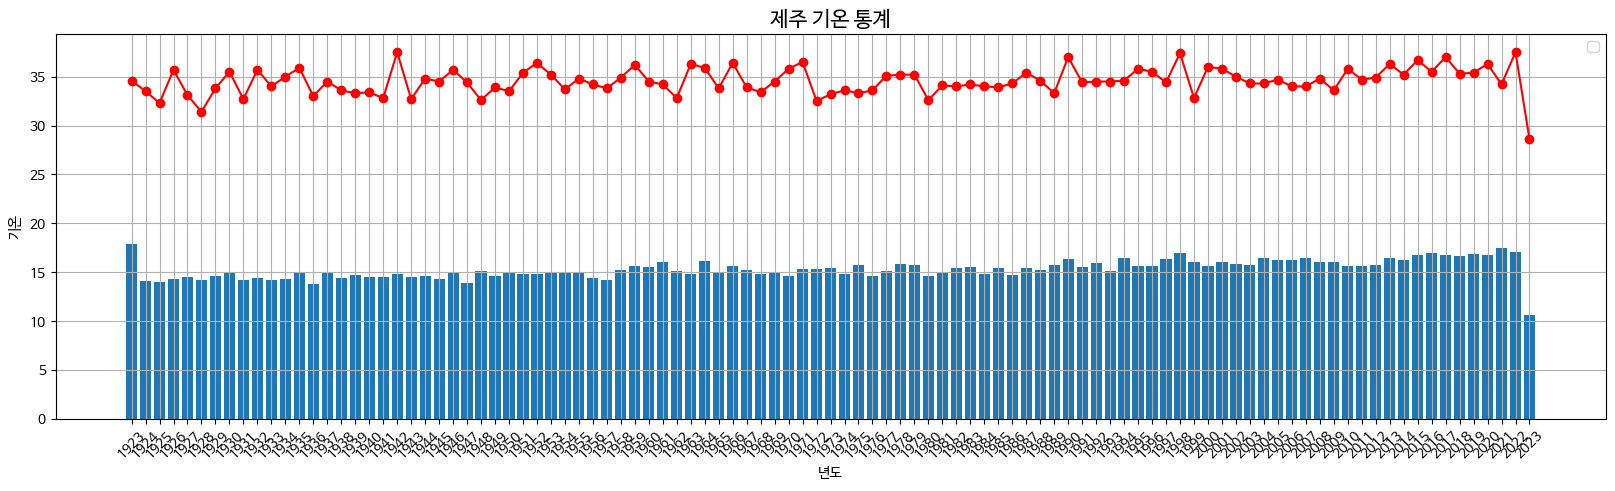

In [48]:
# 3. 그래프로 시각화하기
plt.figure(figsize=(20,5))
plt.title('제주 기온 통계', fontsize=15)         #제목
plt.legend(['최고기온','평균기온']) #범례,기본 위치 : loc='upper left'
plt.xlabel('년도')                 # x축 레이블
plt.ylabel('기온')                 # y축 레이블
plt.xticks(rotation=45)           # x축 레이블 기울이기
plt.grid()                        # 격자 표시

plt.bar(X, Y1)  # 막대 그래프
plt.plot(X, Y2, 'o', linestyle='solid', c='r')  # 선그래프
plt.show()


### [실습] : 2중 축 그래프 그리기 :  평균상대습도 & 월합강수량

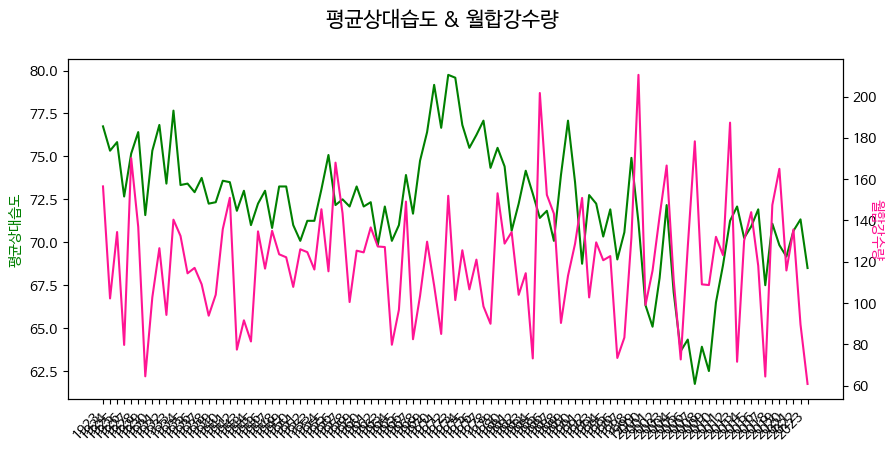

In [50]:
# 2.'제주'지점의 평균상대습도 & 일최다강수량 센터수
data = df.groupby(['지점명','년도'])['평균상대습도'].agg(**{'평균상대습도':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
X  = data['년도']
Y1 = data['평균상대습도']

data = df.groupby(['지점명','년도'])['월합강수량'].agg(**{'월합강수량':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
Y2 = data['월합강수량']
# print(Y2)


# 3. 그래프로 시각화하기
plt.rcParams['figure.figsize'] = (10, 5)   # 그래프 크기

fig, ax1 = plt.subplots()
plt.suptitle('평균상대습도 & 월합강수량',fontsize=15)
ax1.plot(X, Y1, color='green')     # 평균상대습도 (왼쪽)
ax1.set_ylabel('평균상대습도', color = 'green', rotation = 90)
ax2 = ax1.twinx()
ax2.plot(X, Y2, color='deeppink')  # 월합강수량 (오른쪽)
ax2.set_ylabel('월합강수량', color = 'deeppink', rotation = 270)

fig.autofmt_xdate(rotation=45)  #X축 레이블 기울이기

plt.savefig('./sample_data/graph.png')

plt.show()

-------

---------

끝!